# RandomForest

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
from pprint import pprint
from IPython.display import display, HTML

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from scipy.optimize import brute
from skopt import forest_minimize, gbrt_minimize, dummy_minimize
from skopt import callbacks

In [ ]:
# Ccode for print report and matrix side by side
CSS = """
.output {
    flex-direction: row;
}
"""

display(HTML('<style>{}</style>'.format(CSS)))

labels = [ "Normal", "Pneumonia", "Tuberculosis" ]

dataset = []
label = []

Size = 128

In [ ]:
#Read each image from the train and test data and assiging labels 
image_directory = r'C:\Users\rahulmaddula\Desktop\Sem 2\Data Driven Modeling\Assignments\Project\Final\Images'

Normal_images = os.listdir(image_directory + '/Normal/')
for i, image_name in enumerate(Normal_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png' or image_name.split('.')[1] == 'jpeg'):
        image = load_img(image_directory + '/Normal/' + image_name, color_mode = 'rgb')
        
        image = image.resize((Size,Size))
        dataset.append(np.ravel(img_to_array(image)))
        label.append(0)
        
Pneumonia_images = os.listdir(image_directory + '/Pneumonia/')
for i, image_name in enumerate(Pneumonia_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png' or image_name.split('.')[1] == 'jpeg'):
        image = load_img(image_directory + '/Pneumonia/' + image_name, color_mode ='rgb')
        
        image = image.resize((Size,Size))
        dataset.append(np.ravel(img_to_array(image)))
        label.append(1)
        
Tuberculosis_images = os.listdir(image_directory + '/Tuberculosis/')
for i, image_name in enumerate(Tuberculosis_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'png' or image_name.split('.')[1] == 'jpeg'):
        image = load_img(image_directory + '/Tuberculosis/' + image_name, color_mode ='rgb')
        
        image = image.resize((Size,Size))
        dataset.append(np.ravel(img_to_array(image)))
        label.append(2)
        

In [ ]:
#Processing the data as the required format
x_data = np.array(dataset)
y_data = np.array(label)

# Split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 10)

In [ ]:
# Print the parametes of Random Forest model
print('Parameters currently in use:\n')
pprint(RandomForestClassifier(n_estimators = 20, random_state = 10).get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 31.4900
Function value obtained: -0.9504
Current minimum: -0.9504
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 9.3451
Function value obtained: -0.9650
Current minimum: -0.9650
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 5.9290
Function value obtained: -0.9701
Current minimum: -0.9701
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 44.8313
Function value obtained: -0.9530
Current minimum: -0.9701
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 166.8198
Function value obtained: -0.9692
Current minimum: -0.9701
Iteration No: 6 start

C:\Users\jainp\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 78.3744
Function value obtained: -0.9692
Current minimum: -0.9709
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 6.5990
Function value obtained: -0.9615
Current minimum: -0.9709
Iteration No: 26 started. Searching for the next optimal point.
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 6.3282
Function value obtained: -0.9658
Current minimum: -0.9709
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 71.2473
Function value obtained: -0.9590
Current minimum: -0.9709
Iteration No: 28 started. Searching for the next optimal point.
Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 55.7271
Function value obtained: -0.9675
Current minimum: -0.9709
Iteration No: 29

C:\Users\jainp\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 6.4970
Function value obtained: -0.9658
Current minimum: -0.9709
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 36.0857
Function value obtained: -0.9641
Current minimum: -0.9709
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 44.4816
Function value obtained: -0.9632
Current minimum: -0.9709
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 64.5348
Function value obtained: -0.9632
Current minimum: -0.9709
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 113.0600
Function value obtained: -0.9607
Current minimum: -0.9709
Iteration No: 

C:\Users\jainp\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 3.9027
Function value obtained: -0.9632
Current minimum: -0.9709
Iteration No: 41 started. Searching for the next optimal point.
Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 4.6838
Function value obtained: -0.9624
Current minimum: -0.9709
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 5.8303
Function value obtained: -0.9590
Current minimum: -0.9709
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 37.7389
Function value obtained: -0.9538
Current minimum: -0.9709
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 5.5863
Function value obtained: -0.9701
Current minimum: -0.9709
Iteration No: 45 s

C:\Users\jainp\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 6.6766
Function value obtained: -0.9701
Current minimum: -0.9709
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 6.1761
Function value obtained: -0.9632
Current minimum: -0.9709
Iteration No: 49 started. Searching for the next optimal point.
Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 5.8123
Function value obtained: -0.9590
Current minimum: -0.9709
Iteration No: 50 started. Searching for the next optimal point.
Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 3.0838
Function value obtained: -0.9641
Current minimum: -0.9709
Maximimum Recall_score found: 0.97094
Optimal parameters:
n_estimators: 50
criterion: entropy
min_samples_split: 15
min_samples_leaf: 2
max_features: sqrt
bootstrap: False


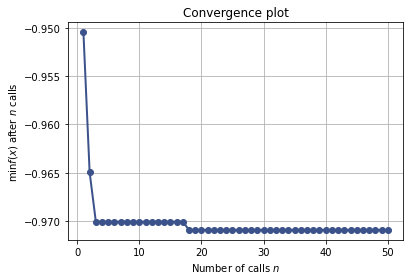

In [ ]:
# Hyperparameters tuning for Random Forest Parameters
# Bayesian Optimization
num_thread=50
params = ['n_estimators', 'criterion', 'min_samples_split', 'min_samples_leaf', 'max_features','bootstrap']

#for model include item_Features
def objective(params):
    # unpack
    n_estimators, criterion, min_samples_split, min_samples_leaf, max_features, bootstrap = params
    
    model_iii = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, bootstrap = bootstrap, random_state=10)
    model_iii.fit(x_train, y_train)
    
    prediction_test = model_iii.predict(x_test)
    recall = recall_score(y_test, prediction_test, average='micro')

    out = -recall
    # Handle some numerical issue going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [(20, 40, 50, 60, 80, 100,),
         ('gini', 'entropy'),
         (5, 10, 15, 20, 25, 30, 35),
         (2, 6, 10, 14, 18, 22, 26, 30),
         ('auto', 'sqrt', 'log2'),
         (True, False),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=num_thread,
                     random_state=10,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=-1)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=num_thread,
         random_state=10,
         verbose=True)

print('Maximimum Recall_score found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);

In [ ]:
# Train the Random Forest Model
model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy',  min_samples_split = 15, min_samples_leaf = 2, max_features= 'sqrt', bootstrap = False, random_state = 10)

model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=15, n_estimators=50, random_state=10)

In [ ]:
# Predict using the trained RF model
y_pred = model.predict(x_test)

# Assigning the labels integer with classes names
y_actual = y_test.astype('object')
y_predicted = y_pred.astype('object')


for i in range(len(labels)):
    y_actual[y_actual == i] = labels[i]
    y_predicted[y_predicted == i] = labels[i]

              precision    recall  f1-score   support

      Normal       0.97      0.95      0.96       371
   Pneumonia       0.97      0.98      0.97       410
Tuberculosis       0.97      0.98      0.98       389

    accuracy                           0.97      1170
   macro avg       0.97      0.97      0.97      1170
weighted avg       0.97      0.97      0.97      1170



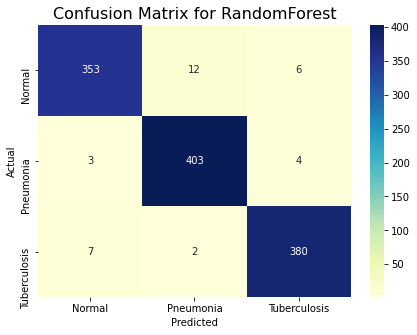

In [ ]:
# Print the classification report 
print(classification_report(y_actual, y_predicted, digits = 2))

# Plot the Confusion Matrix
y_actual = pd.Series(y_actual, name='Actual')
y_predicted = pd.Series(y_predicted, name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix for RandomForest", fontsize=16)
plt.show()